# Working with Time Series

#### Loading Libraries

In [2]:
# Data Manipulation
import pandas as pd
# Numerical Computing
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [3]:
url = 'https://github.com/mattharrison/datasets/raw/master'\
    '/data/dirtydevil.txt'
df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,
                 sep='\t')

/var/folders/dk/f9pbhbp52qxc0613mpbtx8lm0000gn/T/ipykernel_9742/4068458698.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,


In [4]:
def tweak_river(df_):
    return (df_
 .assign(datetime=pd.to_datetime(df_.datetime))
 .rename(columns={'144166_00060': 'cfs',
                  '144167_00065': 'gage_height'})
 .set_index('datetime')
)

In [5]:
dd = tweak_river(df)
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00,USGS,9333500,MDT,9.20,P,6.15,P


#### Adding Timezone Information

In [7]:
dd.tz_cd

datetime
2001-05-07 01:00:00    MDT
2001-05-07 01:15:00    MDT
2001-05-07 01:30:00    MDT
2001-05-07 01:45:00    MDT
2001-05-07 02:00:00    MDT
                      ... 
2020-09-28 08:30:00    MDT
2020-09-28 08:45:00    MDT
2020-09-28 09:00:00    MDT
2020-09-28 09:15:00    MDT
2020-09-28 09:30:00    MDT
Name: tz_cd, Length: 539305, dtype: object

In [8]:
# Saving Time
def tweak_river(df_):
    return (df_
      .assign(datetime=lambda df_:
          pd.to_datetime(df_.datetime + " " +
              df_.tz_cd.str.replace('MST', '-0700')
                 .str.replace('MDT', '-0600'),
              format='%Y-%m-%d %H:%M %z', utc=True))
      .rename(columns={'144166_00060': 'cfs',
                       '144167_00065': 'gage_height'})
      .set_index('datetime')
    )

In [9]:
def to_america_denver_time(df_, time_col, tz_col):
    return (df_
            .assign(**{tz_col: df_[tz_col].replace('MDT', 'MST7MDT')})
            .groupby(tz_col)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                .dt.tz_localize(s.name, ambiguous=True)
                .dt.tz_convert('America/Denver'))
           )

In [10]:
def tweak_river(df_):
    return (df_
      .assign(datetime=to_america_denver_time(df_, 'datetime',
              'tz_cd'))
      .rename(columns={'144166_00060': 'cfs',
                       '144167_00065': 'gage_height'})
      .set_index('datetime')
     )

In [12]:
dd = tweak_river(df)
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00-06:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P


#### Exploring The Data

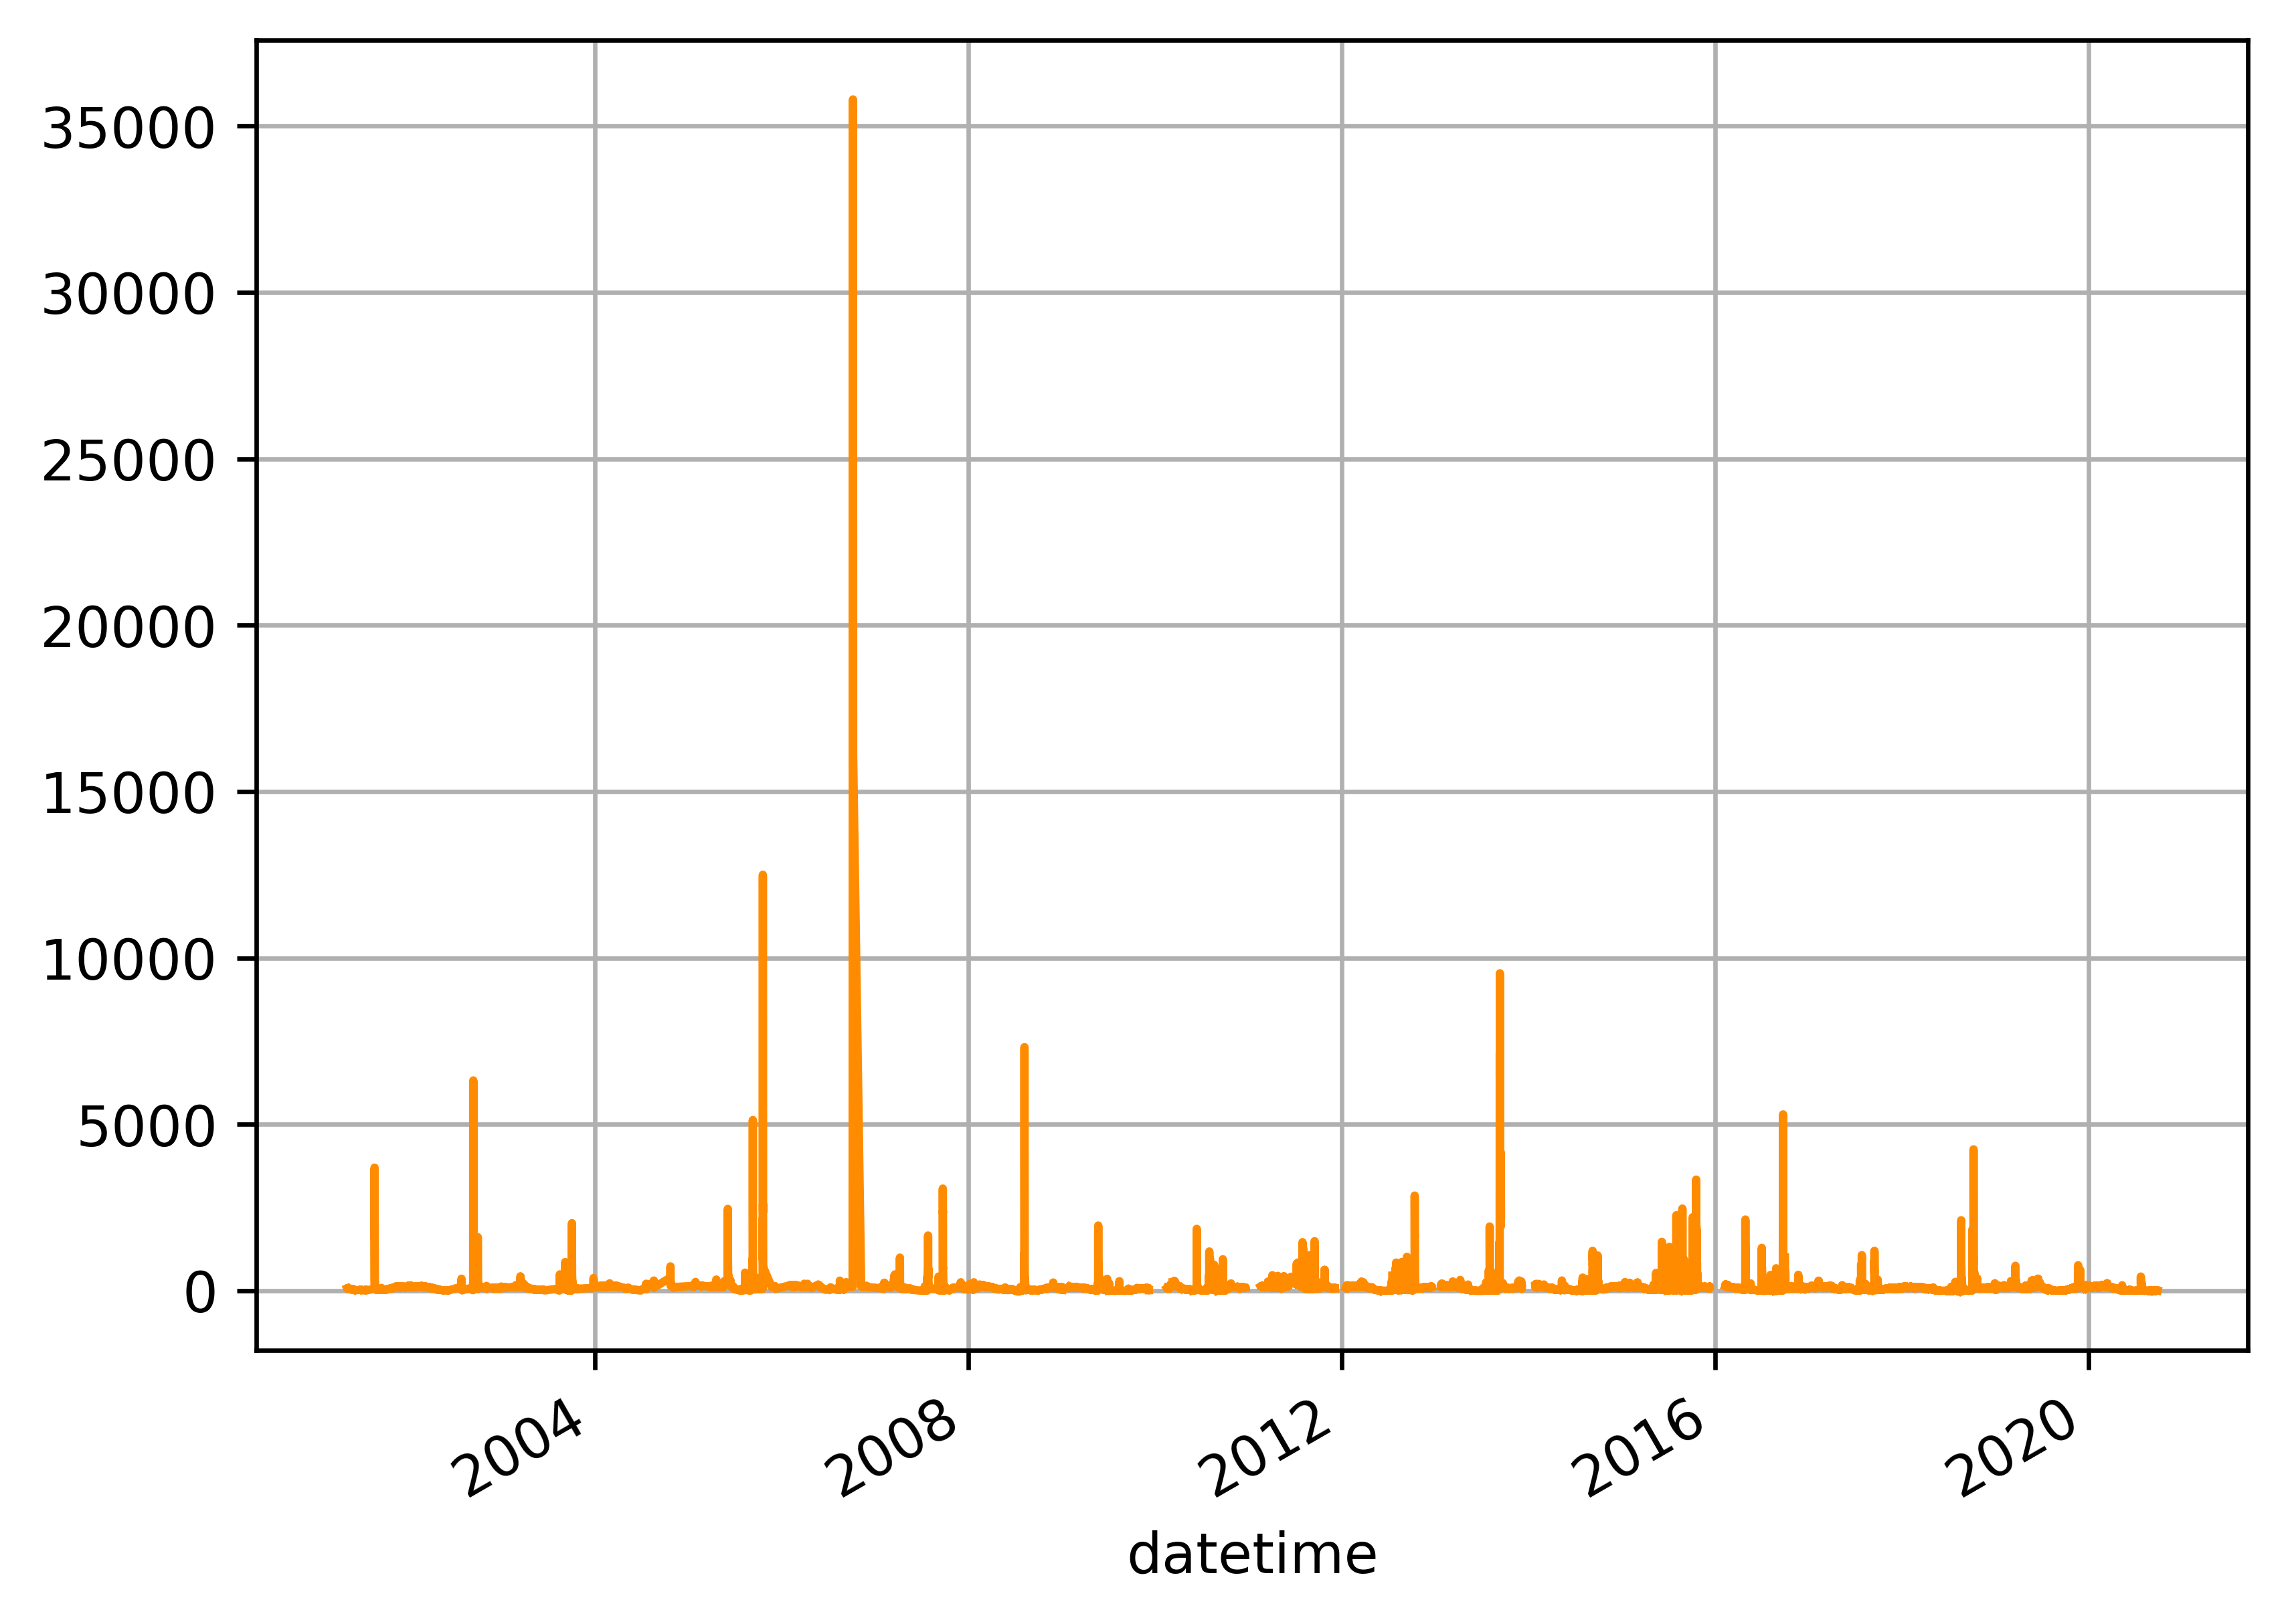

In [15]:
fig, ax = plt.subplots(dpi=600)  
dd.cfs.plot(color='darkorange')  
plt.grid(True)
plt.show()

In [16]:
dd.cfs.describe()

count    493124.000000
mean        104.460537
std         477.341329
min           0.000000
25%          34.700000
50%          81.000000
75%         115.000000
max       35800.000000
Name: cfs, dtype: float64

#### Slicing Time Series

In [17]:
(dd
 .cfs
 .loc['2018']
)

datetime
2018-01-01 00:00:00-07:00     92.8
2018-01-01 00:15:00-07:00     88.3
2018-01-01 00:30:00-07:00     90.5
2018-01-01 00:45:00-07:00     90.5
2018-01-01 01:00:00-07:00     94.0
                             ...  
2018-12-31 22:45:00-07:00    117.0
2018-12-31 23:00:00-07:00    116.0
2018-12-31 23:15:00-07:00    113.0
2018-12-31 23:30:00-07:00    112.0
2018-12-31 23:45:00-07:00    112.0
Name: cfs, Length: 35034, dtype: float64

In [22]:
# (dd
#  .cfs
#  .loc['2018/3':'2019/5']
# )

In [24]:
# (dd  
#  .cfs
#  .loc['2018/3':'2019/5']
#  .plot()
# )

In [26]:
# (dd  
#  .cfs
#  .loc['2018/3':'2019/5']
#  .clip(upper=400)
#  .plot()
# )

In [28]:
# dd2018 = (dd
#  .cfs
#  .loc['2018/3':'2019/5']
#  .clip(upper=400))

In [30]:
# ax = (dd2018
#  .resample('D')
#  .mean()
#  .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily')
# )

In [31]:
# ax = (dd2018
#  .resample('D')
#  .mean()
#  .rolling(7)
#  .mean()
#  .plot(figsize=(10,4), ax=ax, label='7-day Rolling')
# )
# ax.legend()
# ax.set_title('Dirty Devil Flow 2018 (cfs)')

#### Missing TimeSeries Data

In [33]:
# (dd
#   [['cfs']]
#   .loc['2018/3':'2019/5']
#   .query('cfs.isna()')
# )

In [40]:
# (dd    
#   [['cfs']]
#   .loc['2018/7/7':'2018/7/8']
#   .plot(figsize=(10,3))
# )

In [41]:
# fig, ax = plt.subplots(dpi=600, figsize=(10,3))  
# dd_july = (dd
#  ['cfs']
#  .loc['2018/7/7 11:00':'2018/7/7 20:00']
# )

In [43]:
# dd_july.plot(ax=ax, label='original', linewidth=2)  
# (dd_july   # doctest: +SKIP
#  .bfill()
#  .add(.05)
#  .plot(label='bfill', ax=ax, linewidth=.5))

In [44]:
# (dd_july   
#  .ffill()
#  .add(.1)
#  .plot(label='ffill', ax=ax, linewidth=.5))

In [45]:
# (dd_july   
#  .interpolate(method='polynomial', order=3)
#  .add(.15)
#  .plot(label='interpolate poly (order 3)', ax=ax, linewidth=.5))

In [46]:
# (dd_july   
#  .interpolate()
#  .add(.2)
#  .plot(label='interpolate default', ax=ax, linewidth=.5))

In [47]:
# (dd_july   
#  .interpolate(method='nearest')
#  .add(.25)
#  .plot(label='interpolate nearest', ax=ax, linewidth=.5))

In [48]:
# (dd_july   
#  .fillna(1)
#  .add(.3)
#  .plot(label='fillna 1', ax=ax, linewidth=.5))

In [49]:
# ax.legend()   
# ax.set_title('Missing Values Demo')   

#### Exploring Seasonality

In [50]:
(dd
 .groupby(dd.index.month)
 .cfs
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,26011.0,117.268802,29.000354,24.30,101.00,114.0,132.0,265.0
2,41309.0,125.890293,24.280297,56.00,109.00,125.0,141.0,303.0
3,51807.0,127.037609,48.885942,60.30,100.00,116.0,136.0,750.0
4,50669.0,82.786214,74.133528,20.50,52.50,70.0,97.8,2140.0
5,49507.0,63.007851,68.791835,0.31,27.20,43.9,78.5,1960.0
6,41379.0,74.327241,139.857378,0.02,8.93,32.0,82.5,2460.0
7,37089.0,62.775011,115.285805,0.00,4.25,17.4,68.2,1660.0
8,37584.0,74.676246,247.800553,0.00,6.30,25.6,59.1,7320.0
9,42272.0,128.309332,546.921269,0.00,7.55,20.0,55.9,9540.0


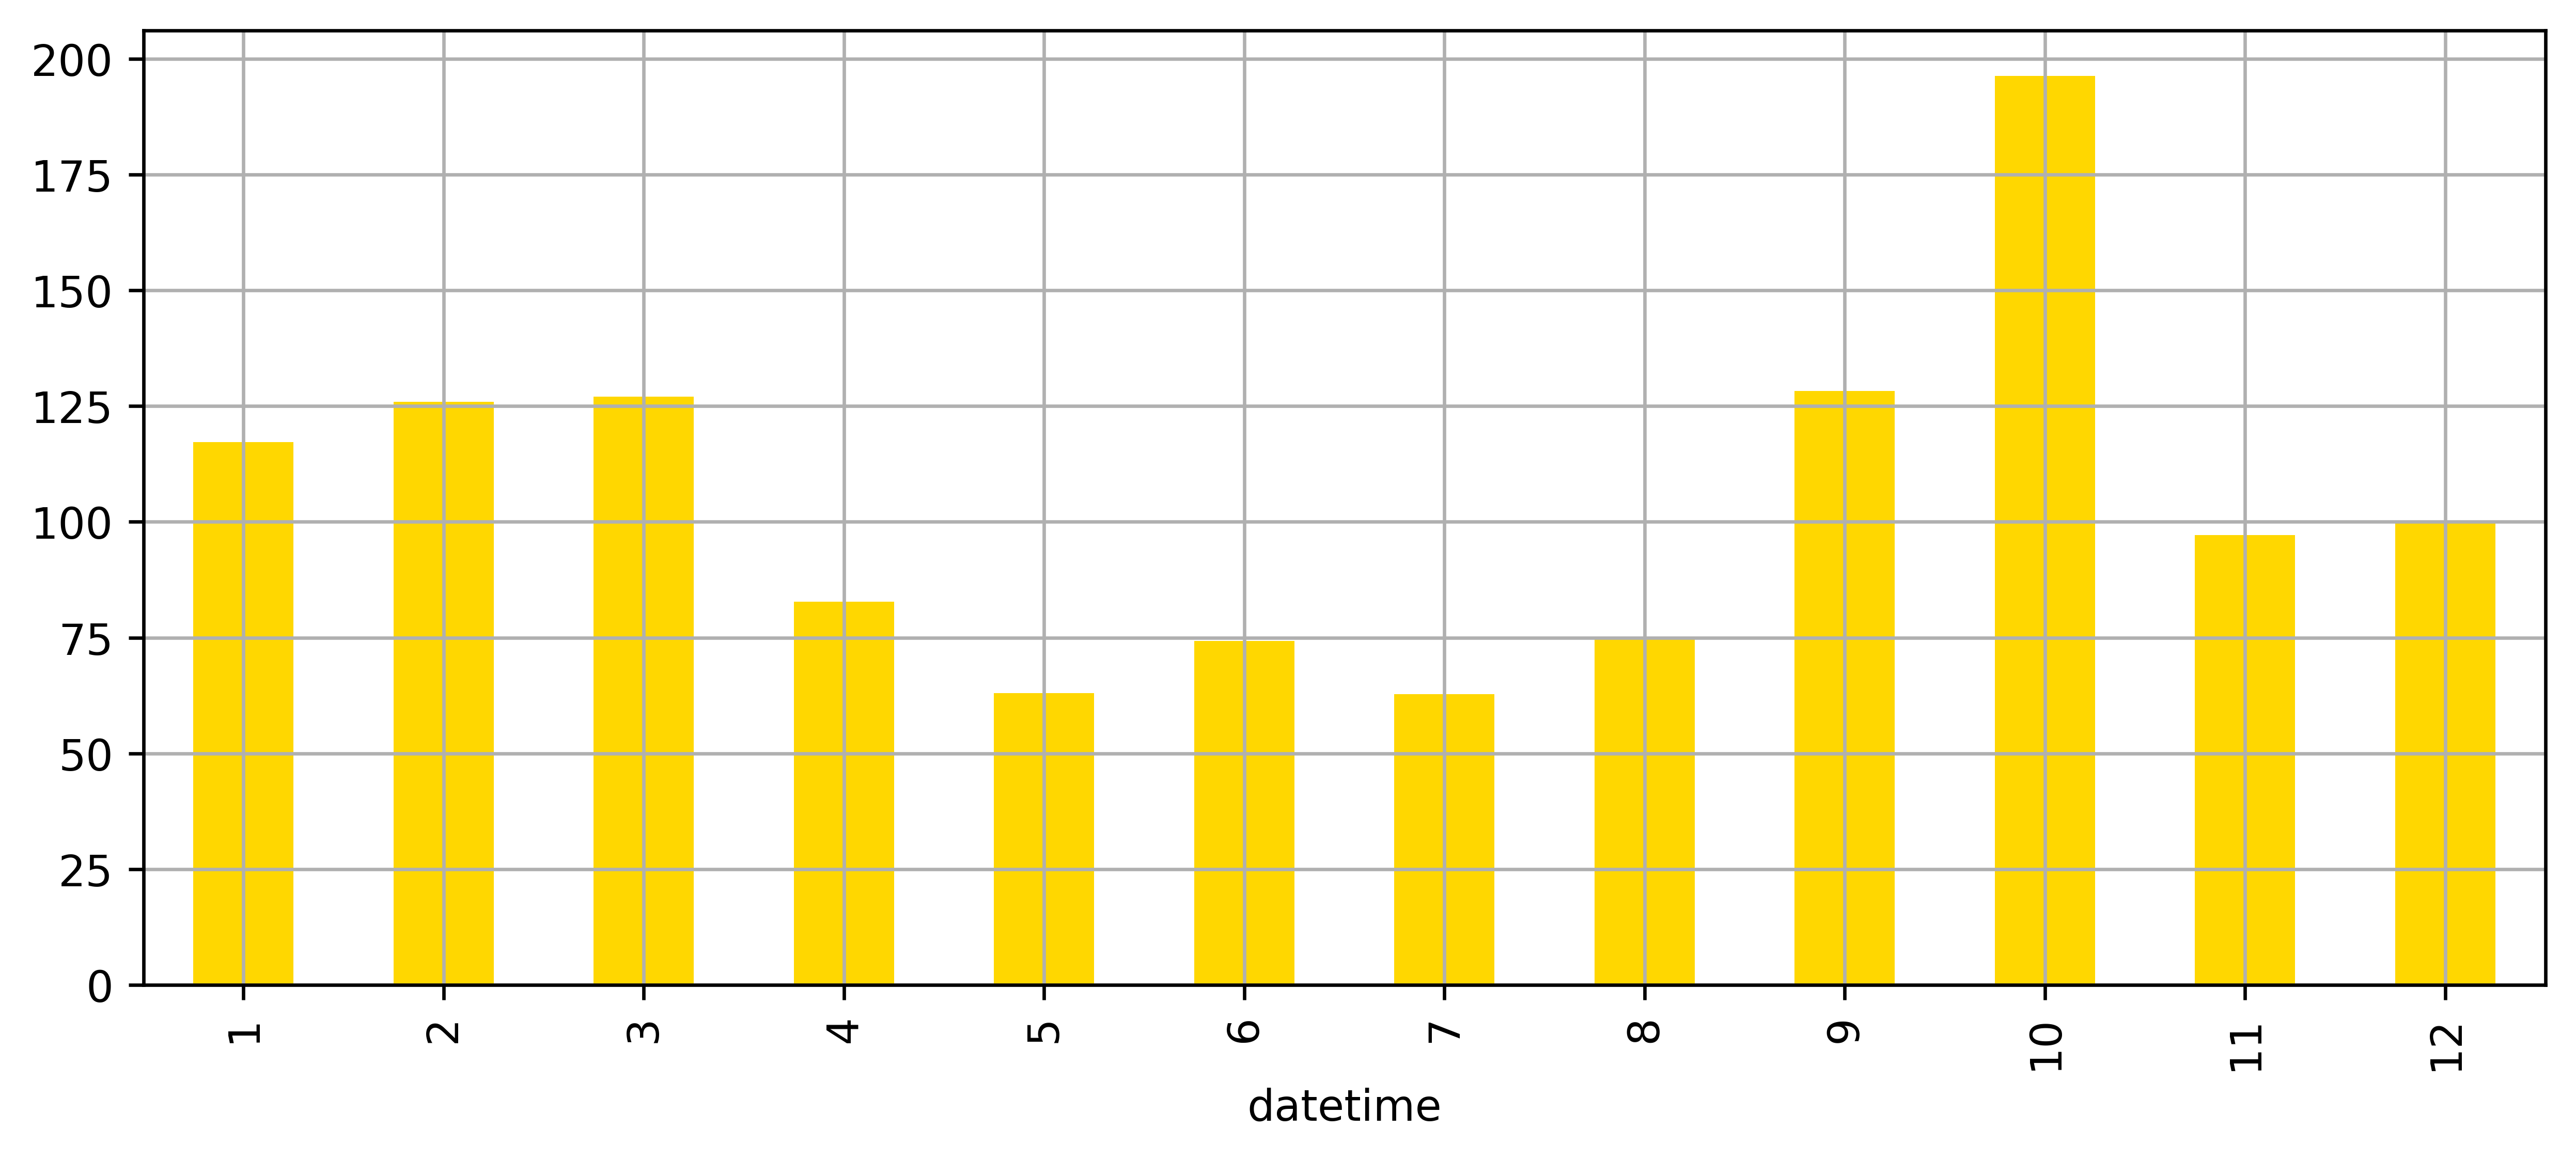

In [53]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4)) 
(dd  
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 ['mean']
 .plot.bar(ax=ax, color='gold')
)

plt.grid(True)
plt.show()

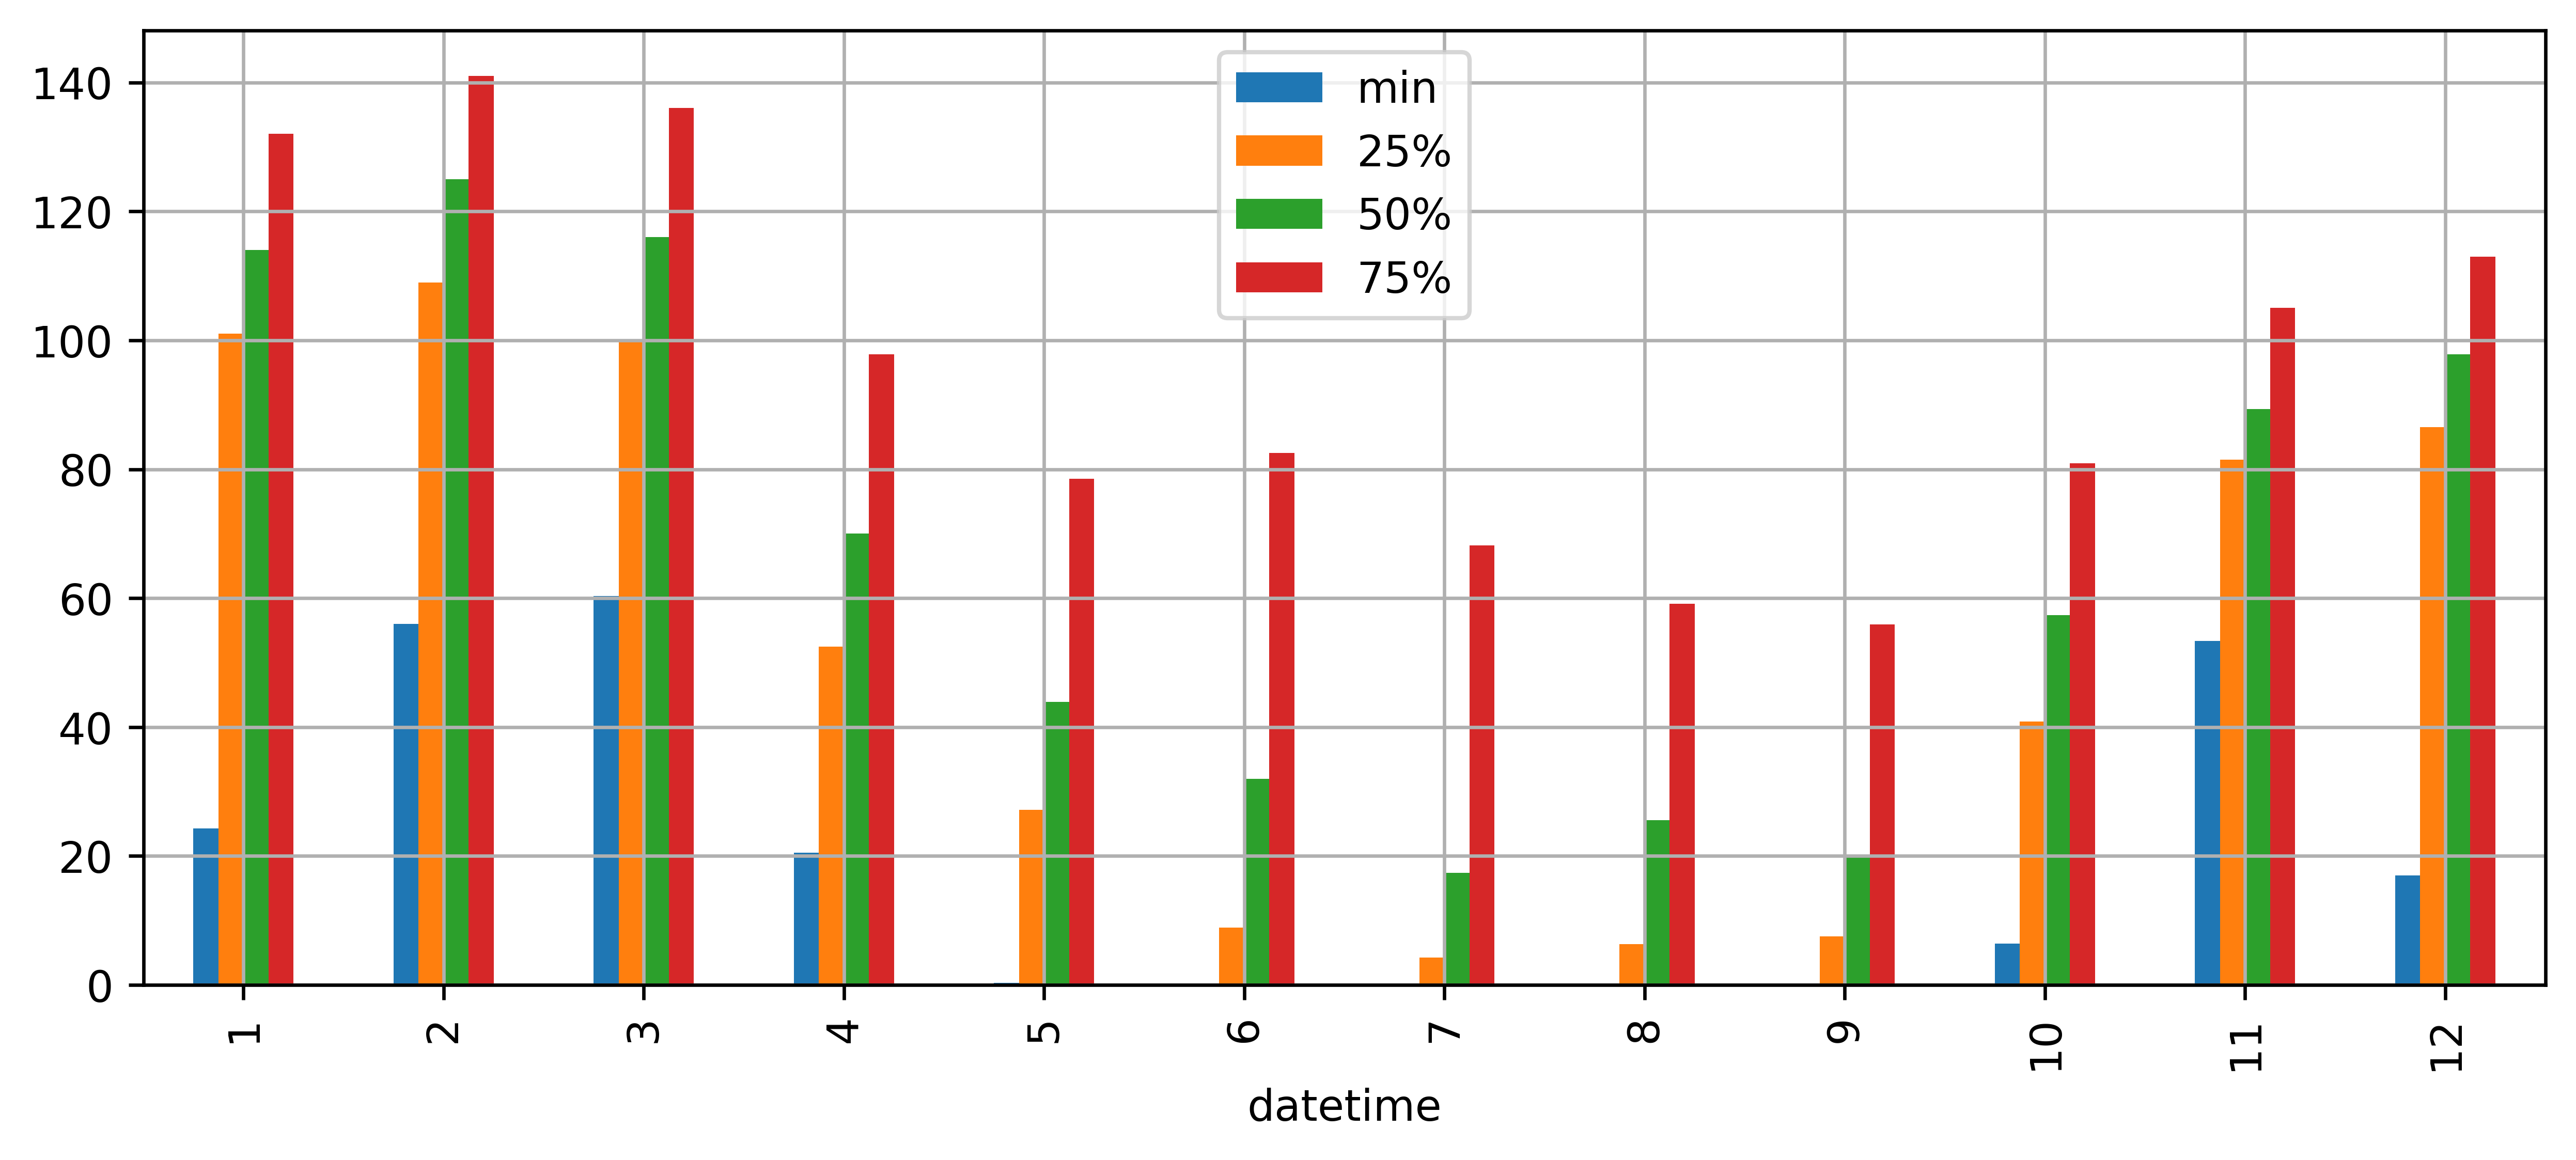

In [54]:
# Quantile Line Approach
fig, ax = plt.subplots(dpi=600, figsize=(10,4))  # doctest: +SKIP
(dd  # doctest: +SKIP
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 .loc[:, 'min':'75%']
 .plot.bar(ax=ax)
)

plt.grid(True)
plt.show()

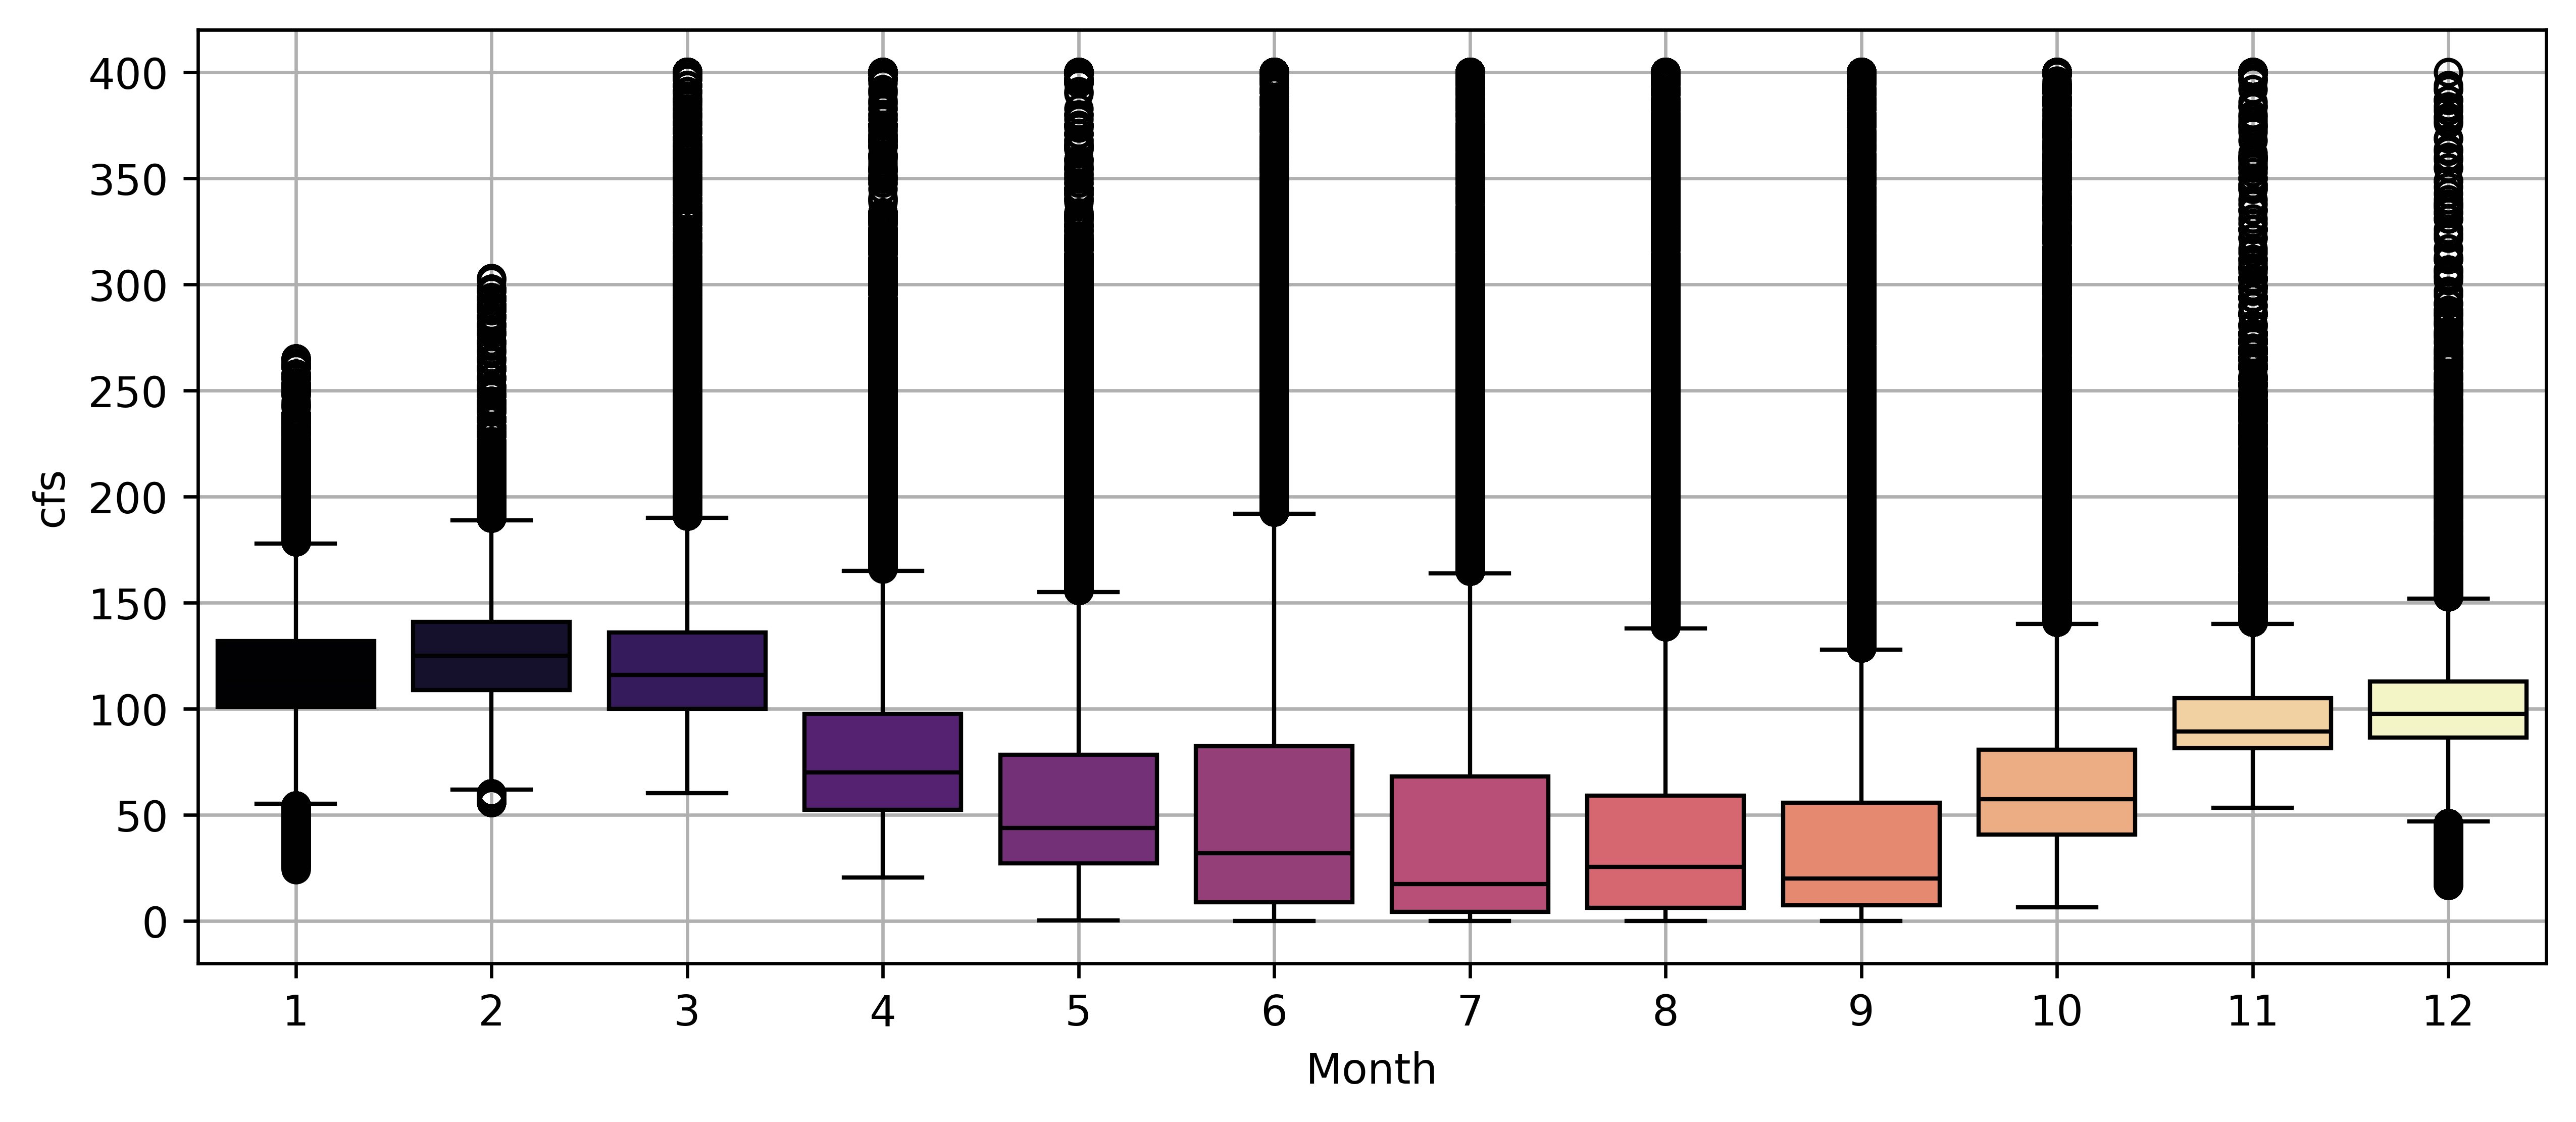

In [59]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4)) 

sns.boxplot(data=dd.assign(cfs=dd.cfs.clip(upper=400)),   
            x=dd.index.month.rename('Month'), y='cfs', ax=ax,
            palette='magma', hue=dd.index.month.rename('Month'), legend=False)

plt.grid(True)
plt.show()

#### Resampling Data

In [60]:
dd.cfs

datetime
2001-05-07 01:00:00-06:00    71.00
2001-05-07 01:15:00-06:00    71.00
2001-05-07 01:30:00-06:00    71.00
2001-05-07 01:45:00-06:00    70.00
2001-05-07 02:00:00-06:00    70.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 539305, dtype: float64

In [62]:
# (dd
#  .resample('D')
#  .median()
# )

#### Rules woth Offset Aliases

In [64]:
# (dd
#   .resample('2D')
#   .median()
# )

#### Combining Offset Aliases

In [68]:
# (dd
#   .resample('3D2h10min')
#   .median()
# )

#### Anchored Offset Aliases

In [70]:
# (dd
#   .resample('Q')
#   .median()
# )

In [72]:
# (dd
#   .resample('Q-JAN')
#   .median()
# )

#### Resampling to Finer-Grain Frequency

In [74]:
# (dd
#   .resample('2min')
#   .median()
# )

In [76]:
# (dd
#   .resample('2min')
#   .median()
#   .interpolate()
# )

#### Grouping Data Column with pd.Grouper

In [78]:
# (dd
#   .resample('Q-JAN')
#   .median()
# )

In [80]:
# (dd
#   .reset_index()
#   .groupby(pd.Grouper(key='datetime', freq='Q-JAN'))
#   .median()
# )